## Import Packages

In [35]:
import pandas as pd
import numpy as np

## Exploratory Data Analysis

In [47]:
df = pd.read_csv('data/5guys_flight_data.csv')
print(df.columns)
print(df['ARR_DELAY_NEW'])

/var/folders/36/xfvf6zw53bd2ht35p52k28qh0000gn/T/ipykernel_30461/3189693986.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/5guys_flight_data.csv')


Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME_x', 'DEST_AIRPORT_ID', 'DEST', 'DEST_CITY_NAME',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_TIME_BLK', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY_NEW',
       'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 32', 'AIRLINE_ID', 'CARRIER_NAME', 'MANUFACTURE_YEAR',
       'NUMBER_OF_SEATS', 'PLANE_AGE', 'DEPARTING_AIRPORT',
       'ORIGIN_CITY_NAME_y', 'NAME_x', 'SEGMENT_NUMBER', 'PREVIOUS_AIRPORT',
       'DISPLAY_AIRPORT_NAME', 'ORIGIN_CITY_NAME', 'NAME_y', 'STATION', 'DATE',
       'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WDF2',
       'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03',

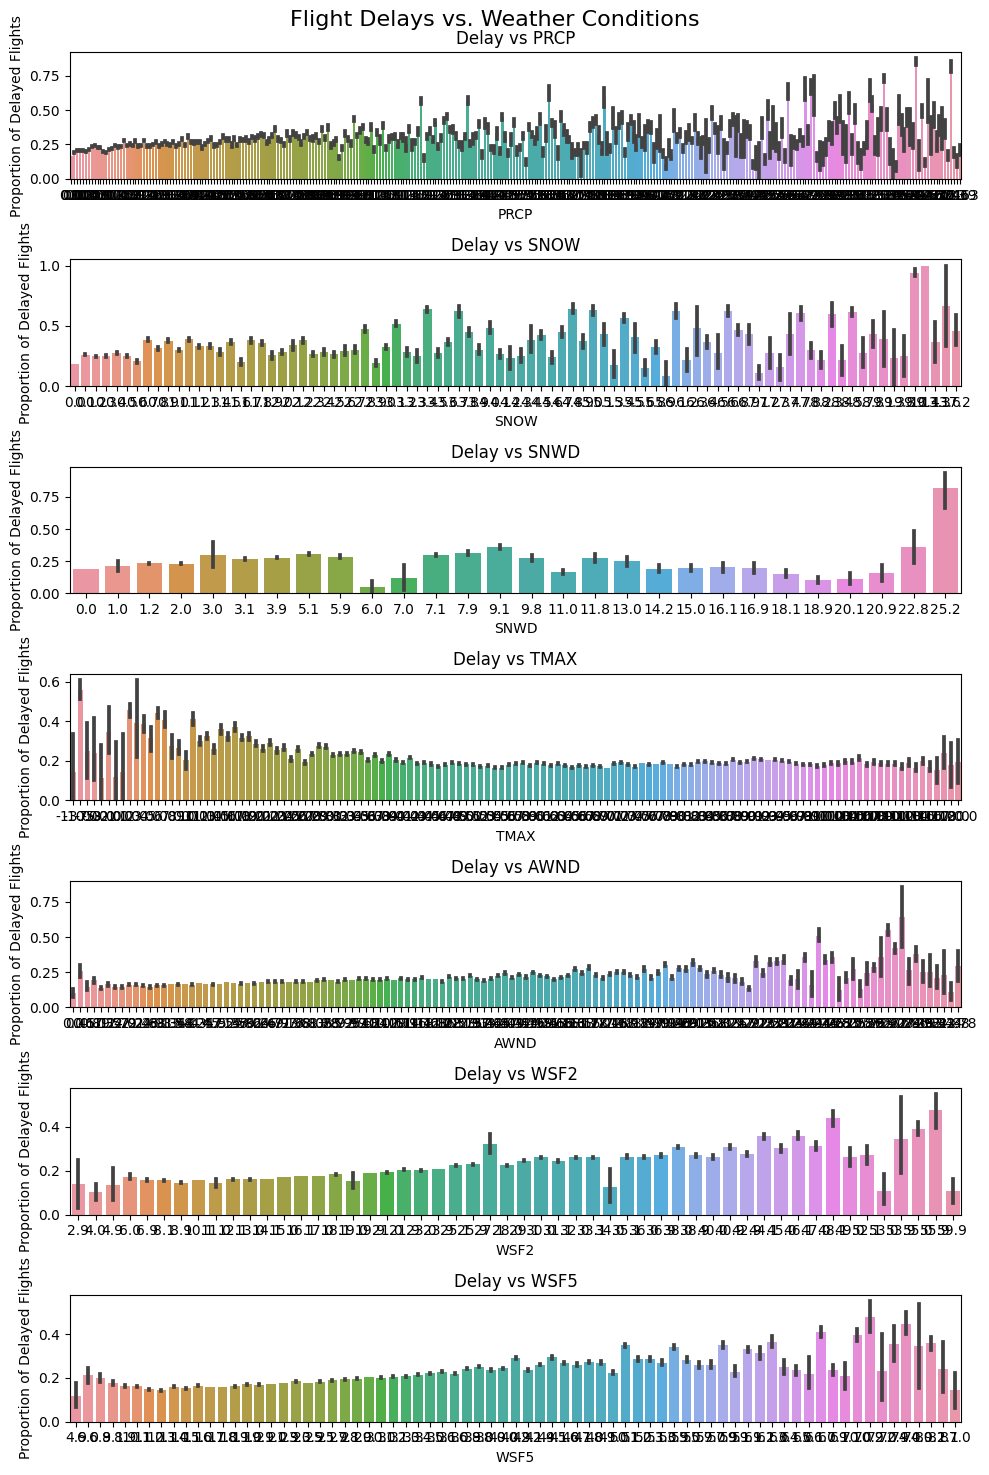

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame with delayed and not delayed flights
delayed_flights = df[df['WEATHER_DELAY'] == 1]
not_delayed_flights = df[df['WEATHER_DELAY'] == 0]

# Weather columns of interest
weather_columns = ['PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND', 'WSF2', 'WSF5']

# Create subplots for each weather condition
fig, axes = plt.subplots(nrows=len(weather_columns), ncols=1, figsize=(10, 15))
fig.suptitle('Flight Delays vs. Weather Conditions', fontsize=16)

for i, weather_column in enumerate(weather_columns):
    # Plot delayed and not delayed flights for each weather condition
    ax = axes[i]
    sns.barplot(x=weather_column, y='DEP_DEL15', data=df, ax=ax)
    ax.set_title(f'Delay vs {weather_column}')
    ax.set_xlabel(f'{weather_column}')
    ax.set_ylabel('Proportion of Delayed Flights')

plt.tight_layout()
plt.show()


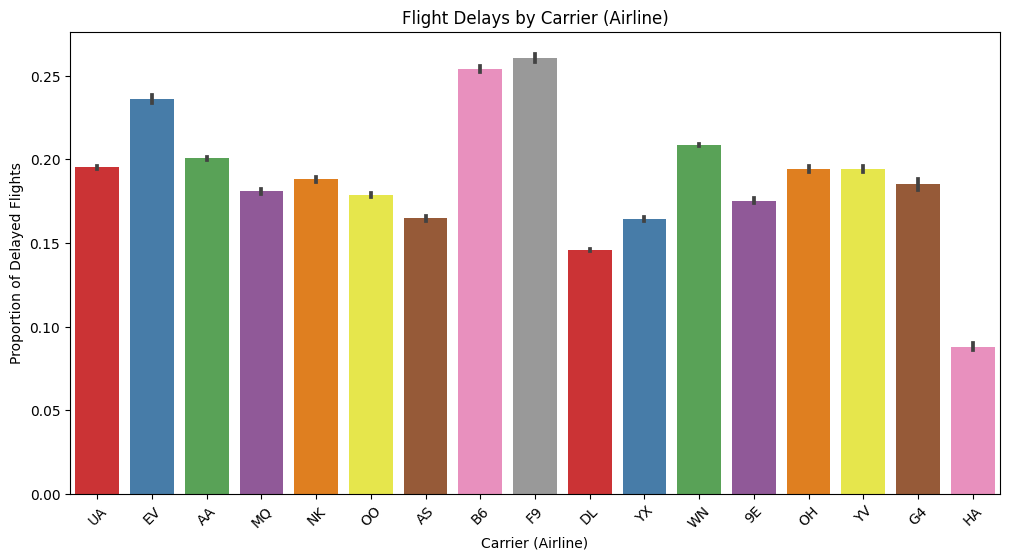

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot to show flight delays by carrier (airline)
plt.figure(figsize=(12, 6))
sns.barplot(x='OP_UNIQUE_CARRIER', y='DEP_DEL15', data=df, palette="Set1")
plt.title('Flight Delays by Carrier (Airline)')
plt.xlabel('Carrier (Airline)')
plt.ylabel('Proportion of Delayed Flights')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


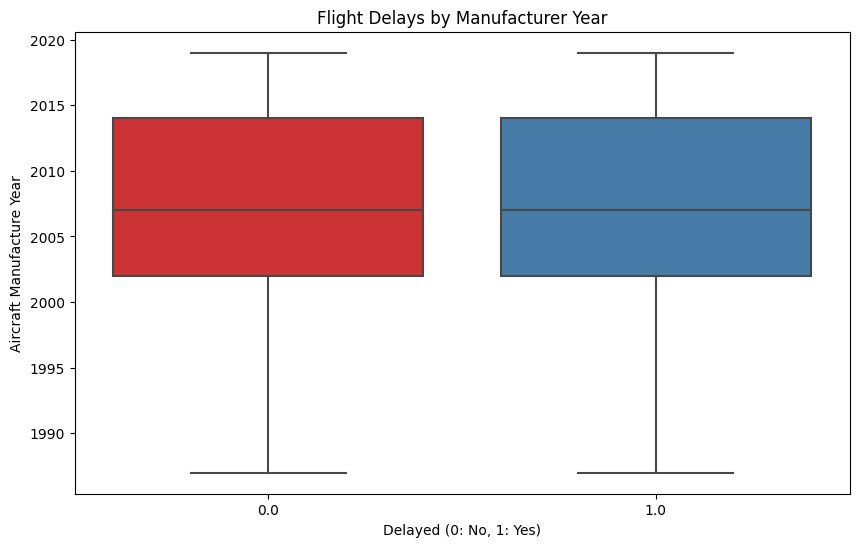

In [ ]:
# Create a box plot to show the relationship between flight delays and the aircraft manufacture year
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEP_DEL15', y='MANUFACTURE_YEAR', data=df, palette="Set1")
plt.title('Flight Delays by Manufacturer Year')
plt.xlabel('Delayed (0: No, 1: Yes)')
plt.ylabel('Aircraft Manufacture Year')
plt.show()

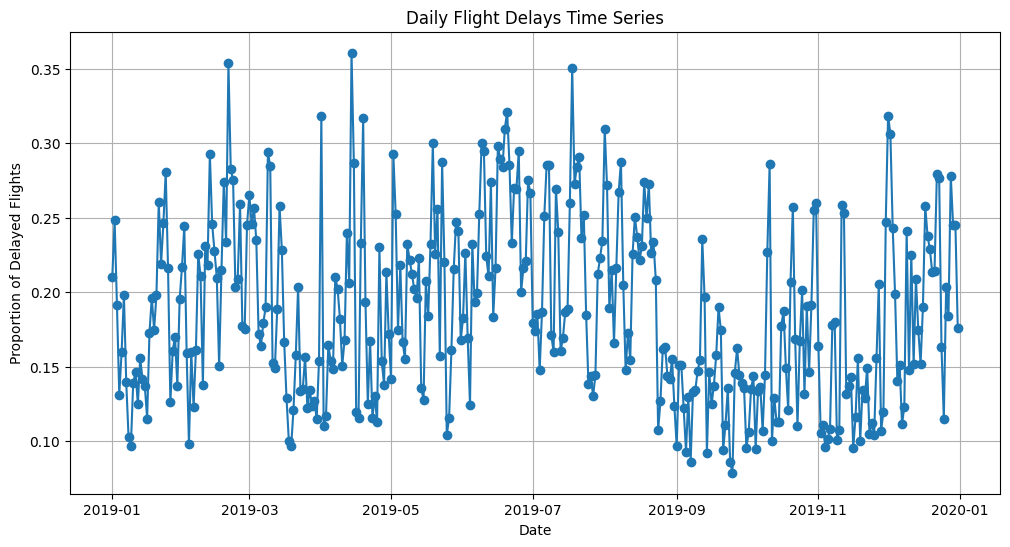

In [ ]:
# Assuming 'DATE' is the column containing the date information
# and 'DEP_DEL15' is the column indicating flight delays (1: Yes, 0: No)
df['DATE'] = pd.to_datetime(df['DATE'])  # Convert the 'DATE' column to a datetime object
df.set_index('DATE', inplace=True)  # Set the date as the index of the DataFrame

# Resample the data to daily frequency and calculate the proportion of delayed flights
daily_delays = df['DEP_DEL15'].resample('D').mean()

# Create a time series plot for daily flight delays
plt.figure(figsize=(12, 6))
plt.plot(daily_delays.index, daily_delays, marker='o', linestyle='-')
plt.title('Daily Flight Delays Time Series')
plt.xlabel('Date')
plt.ylabel('Proportion of Delayed Flights')
plt.grid(True)
plt.show()

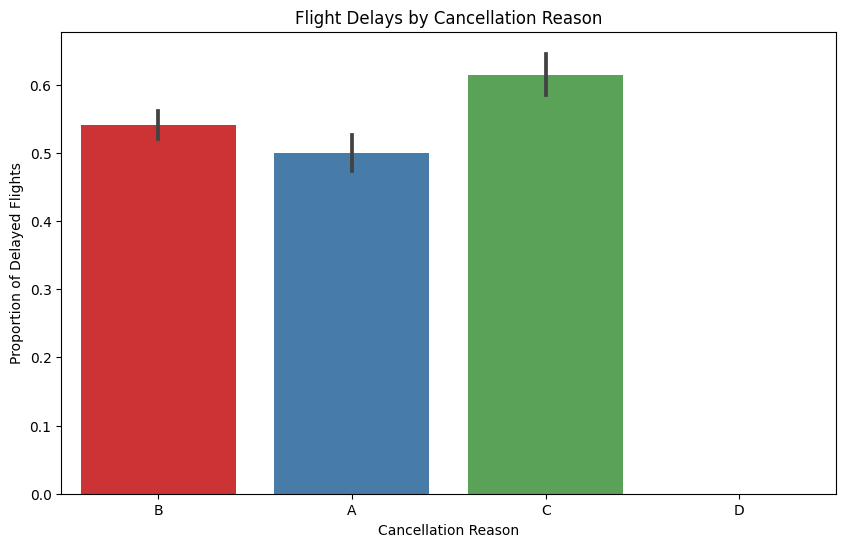

In [ ]:
# Create a bar plot to show flight delays by cancellation reason
plt.figure(figsize=(10, 6))
sns.barplot(x='CANCELLATION_CODE', y='DEP_DEL15', data=df, palette="Set1")
plt.title('Flight Delays by Cancellation Reason')
plt.xlabel('Cancellation Reason')
plt.ylabel('Proportion of Delayed Flights')
plt.show()

## Preprocessing

In [ ]:
missing_values = df.isnull().sum()
print(missing_values.to_string())


MONTH                         0
DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
TAIL_NUM                      0
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN                        0
ORIGIN_CITY_NAME_x            0
DEST_AIRPORT_ID               0
DEST                          0
DEST_CITY_NAME                0
CRS_DEP_TIME                  0
DEP_TIME                      0
DEP_DELAY_NEW                11
DEP_DEL15                    11
DEP_TIME_BLK                  0
CRS_ARR_TIME                  0
ARR_TIME                   6916
ARR_DELAY_NEW             21480
ARR_TIME_BLK                  0
CANCELLED                     0
CANCELLATION_CODE       6588864
CRS_ELAPSED_TIME              2
ACTUAL_ELAPSED_TIME       21480
DISTANCE                      0
DISTANCE_GROUP                0
CARRIER_DELAY           5328016
WEATHER_DELAY           5328016
NAS_DELAY               5328016
SECURITY_DELAY          5328016
LATE_AIR

In [48]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder for 'OP_UNIQUE_CARRIER'
label_encoder_carrier = LabelEncoder()

# Fit the LabelEncoder to 'OP_UNIQUE_CARRIER' column and transform it
df['OP_UNIQUE_CARRIER'] = label_encoder_carrier.fit_transform(df['OP_UNIQUE_CARRIER'])

# Initialize the LabelEncoder for 'PREVIOUS_AIRPORT'
label_encoder_airport = LabelEncoder()

# Fit the LabelEncoder to 'PREVIOUS_AIRPORT' column and transform it
df['ORIGIN_CITY_NAME'] = label_encoder_airport.fit_transform(df['ORIGIN_CITY_NAME'])

# Print the transformed columns
print(df[['OP_UNIQUE_CARRIER', 'ORIGIN_CITY_NAME']])


         OP_UNIQUE_CARRIER  ORIGIN_CITY_NAME
0                       13                13
1                        5                13
2                       13                13
3                       13                13
4                       13                13
...                    ...               ...
6593304                  8                41
6593305                  8                41
6593306                  7                81
6593307                  7                81
6593308                  7                81

[6593309 rows x 2 columns]


## Training

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer


# Load your dataset
# Assuming your dataset is in a DataFrame called 'df'
# Initialize the imputer with the strategy set to 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the 'TMAX' column
df['TMAX'] = imputer.fit_transform(df[['TMAX']])

# Select relevant features (you can add more features as needed)
features = [
    'MONTH',
    'DAY_OF_MONTH',
    'DAY_OF_WEEK',
    'DISTANCE',
    'MANUFACTURE_YEAR',
    'TMAX',
    # Add other features as needed
]

target = 'DEP_DEL15'  # You can choose another relevant column for binary classification
df = df.dropna(subset=['DEP_DEL15'])

# Split the dataset into training and testing sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform SMOTE oversampling on the target variable to balance it
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and train an XGBoost classification model
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)  # 'binary:logistic' for binary classification

model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)


Accuracy: 0.7937428905100632
Confusion Matrix:
[[1023969   45799]
 [ 226184   22708]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88   1069768
         1.0       0.33      0.09      0.14    248892

    accuracy                           0.79   1318660
   macro avg       0.58      0.52      0.51   1318660
weighted avg       0.73      0.79      0.74   1318660



In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss



# Load your dataset
# Assuming your dataset is in a DataFrame called 'df'

# Select relevant features (you can add more features as needed)
features = [
    'DAY_OF_WEEK',
    'MONTH',
    'DAY_OF_MONTH',
    'DISTANCE',
    'MANUFACTURE_YEAR',
    'TMAX',
    'PRCP',
    'WSF2',
    'AIRLINE_ID',
    'SNWD',
    'WSF5',
    # Add other features as needed
]

target = 'DELAYS'  # You can choose another relevant column for binary classification

# Define a threshold for what constitutes a delay (e.g., 15 minutes)
delay_threshold = 15
df['DELAYS'] = (df['ARR_DELAY_NEW'] >= delay_threshold).astype(int)
df['PRCP'] = imputer.fit_transform(df[['PRCP']])
df['WSF2'] = imputer.fit_transform(df[['WSF2']])
df['SNWD'] = imputer.fit_transform(df[['SNWD']])
df['WSF5'] = imputer.fit_transform(df[['WSF5']])

# Filter rows with DEP_DEL15 (your binary classification target)
df = df[df['DELAYS'].notna()]

# Split the dataset into training and testing sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply NearMiss under-sampling to balance the dataset
undersample = NearMiss(version=1, n_neighbors=3)

X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# Create and train an XGBoost classification model
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)  # 'binary:logistic' for binary classification

model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)


Accuracy: 0.4816230112386817
Confusion Matrix:
[[470542 595059]
 [ 88504 164555]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.44      0.58   1065601
           1       0.22      0.65      0.32    253059

    accuracy                           0.48   1318660
   macro avg       0.53      0.55      0.45   1318660
weighted avg       0.72      0.48      0.53   1318660



In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from sklearn.neighbors import KNeighborsClassifier



# Load your dataset
# Assuming your dataset is in a DataFrame called 'df'

# Select relevant features (you can add more features as needed)
features = [
    'DAY_OF_WEEK',
    'MONTH',
    'DAY_OF_MONTH',
    'DISTANCE',
    'MANUFACTURE_YEAR',
    'TMAX',
    'PRCP',
    'WSF2',
    'AIRLINE_ID',
    'SNWD',
    'WSF5',
    # Add other features as needed
]

target = 'DELAYS'  # You can choose another relevant column for binary classification

# Define a threshold for what constitutes a delay (e.g., 15 minutes)
delay_threshold = 15
df['DELAYS'] = (df['ARR_DELAY_NEW'] >= delay_threshold).astype(int)
df['PRCP'] = imputer.fit_transform(df[['PRCP']])
df['WSF2'] = imputer.fit_transform(df[['WSF2']])
df['SNWD'] = imputer.fit_transform(df[['SNWD']])
df['WSF5'] = imputer.fit_transform(df[['WSF5']])

# Filter rows with DEP_DEL15 (your binary classification target)
df = df[df['DELAYS'].notna()]

# Split the dataset into training and testing sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply NearMiss under-sampling to balance the dataset
undersample = NearMiss(version=1, n_neighbors=3)

X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# Create and train a KNN classification model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

knn.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)


Accuracy: 0.48323904569790543
Confusion Matrix:
[[481797 583804]
 [ 97628 155431]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.45      0.59   1065601
           1       0.21      0.61      0.31    253059

    accuracy                           0.48   1318660
   macro avg       0.52      0.53      0.45   1318660
weighted avg       0.71      0.48      0.53   1318660



In [2]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('data/5guys_flight_data.csv')


# Initialize the LabelEncoder for 'OP_UNIQUE_CARRIER'
label_encoder_carrier = LabelEncoder()

# Fit the LabelEncoder to 'OP_UNIQUE_CARRIER' column and transform it
df['OP_UNIQUE_CARRIER'] = label_encoder_carrier.fit_transform(df['OP_UNIQUE_CARRIER'])

# Initialize the LabelEncoder for 'PREVIOUS_AIRPORT'
label_encoder_airport = LabelEncoder()

# Fit the LabelEncoder to 'PREVIOUS_AIRPORT' column and transform it
df['ORIGIN_CITY_NAME'] = label_encoder_airport.fit_transform(df['ORIGIN_CITY_NAME'])

# Print the transformed columns
print(df[['OP_UNIQUE_CARRIER', 'ORIGIN_CITY_NAME']])


/var/folders/36/xfvf6zw53bd2ht35p52k28qh0000gn/T/ipykernel_50165/2213610472.py:3: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/5guys_flight_data.csv')


         OP_UNIQUE_CARRIER  ORIGIN_CITY_NAME
0                       13                13
1                        5                13
2                       13                13
3                       13                13
4                       13                13
...                    ...               ...
6593304                  8                41
6593305                  8                41
6593306                  7                81
6593307                  7                81
6593308                  7                81

[6593309 rows x 2 columns]


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from sklearn.impute import SimpleImputer




# Load your dataset
# Assuming your dataset is in a DataFrame called 'df'

# Select relevant features (you can add more features as needed)
features = [
    'DAY_OF_WEEK',
    'MONTH',
    'DAY_OF_MONTH',
    'DISTANCE',
    'MANUFACTURE_YEAR',
    'TMAX',
    'PRCP',
    'WSF2',
    'AIRLINE_ID',
    'SNWD',
    'WSF5',
    # Add other features as needed
]
imputer = SimpleImputer(strategy='mean')


target = 'WEATHER_DELAY'  # You can choose another relevant column for binary classification

# Define a threshold for what constitutes a delay (e.g., 15 minutes)
delay_threshold = 15
df['DELAYS'] = (df['ARR_DELAY_NEW'] >= delay_threshold).astype(int)
df['PRCP'] = imputer.fit_transform(df[['PRCP']])
df['WSF2'] = imputer.fit_transform(df[['WSF2']])
df['SNWD'] = imputer.fit_transform(df[['SNWD']])
df['WSF5'] = imputer.fit_transform(df[['WSF5']])

# Filter rows with DEP_DEL15 (your binary classification target)
df = df[df['WEATHER_DELAY'].notna()]

# Split the dataset into training and testing sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply NearMiss under-sampling to balance the dataset
#undersample = NearMiss(version=1, n_neighbors=3)

#X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# Create and train an XGBoost classification model
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)  # 'binary:logistic' for binary classification

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485
 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503
 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521
 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539
 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557
 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575
 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593
 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611
 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629
 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647
 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665
 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683
 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 701
 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716 717 718 719
 720 721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737
 738 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755
 756 757 758 759 760 761 762 763 764 765 766 767 768 769 770 771 772 773
 774 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791
 792 793 794 795 796 797 798 799 800 801 802 803 804 805 806 807 808 809
 810 811 812 813 814 815 816 817 818 819 820 821 822 823 824 825 826 827
 828 829 830 831 832 833 834 835 836 837 838 839 840 841 842 843 844 845
 846 847 848 849 850 851 852 853 854 855 856 857 858 859 860 861 862 863
 864 865 866 867 868 869 870 871 872 873 874 875 876 877 878 879 880 881
 882 883 884 885 886 887 888 889 890 891 892 893 894 895 896 897 898 899
 900 901 902 903 904 905 906 907 908 909 910 911 912 913 914 915 916 917
 918 919 920 921 922 923 924 925 926 927 928 929 930], got [0.000e+00 1.000e+00 2.000e+00 3.000e+00 4.000e+00 5.000e+00 6.000e+00
 7.000e+00 8.000e+00 9.000e+00 1.000e+01 1.100e+01 1.200e+01 1.300e+01
 1.400e+01 1.500e+01 1.600e+01 1.700e+01 1.800e+01 1.900e+01 2.000e+01
 2.100e+01 2.200e+01 2.300e+01 2.400e+01 2.500e+01 2.600e+01 2.700e+01
 2.800e+01 2.900e+01 3.000e+01 3.100e+01 3.200e+01 3.300e+01 3.400e+01
 3.500e+01 3.600e+01 3.700e+01 3.800e+01 3.900e+01 4.000e+01 4.100e+01
 4.200e+01 4.300e+01 4.400e+01 4.500e+01 4.600e+01 4.700e+01 4.800e+01
 4.900e+01 5.000e+01 5.100e+01 5.200e+01 5.300e+01 5.400e+01 5.500e+01
 5.600e+01 5.700e+01 5.800e+01 5.900e+01 6.000e+01 6.100e+01 6.200e+01
 6.300e+01 6.400e+01 6.500e+01 6.600e+01 6.700e+01 6.800e+01 6.900e+01
 7.000e+01 7.100e+01 7.200e+01 7.300e+01 7.400e+01 7.500e+01 7.600e+01
 7.700e+01 7.800e+01 7.900e+01 8.000e+01 8.100e+01 8.200e+01 8.300e+01
 8.400e+01 8.500e+01 8.600e+01 8.700e+01 8.800e+01 8.900e+01 9.000e+01
 9.100e+01 9.200e+01 9.300e+01 9.400e+01 9.500e+01 9.600e+01 9.700e+01
 9.800e+01 9.900e+01 1.000e+02 1.010e+02 1.020e+02 1.030e+02 1.040e+02
 1.050e+02 1.060e+02 1.070e+02 1.080e+02 1.090e+02 1.100e+02 1.110e+02
 1.120e+02 1.130e+02 1.140e+02 1.150e+02 1.160e+02 1.170e+02 1.180e+02
 1.190e+02 1.200e+02 1.210e+02 1.220e+02 1.230e+02 1.240e+02 1.250e+02
 1.260e+02 1.270e+02 1.280e+02 1.290e+02 1.300e+02 1.310e+02 1.320e+02
 1.330e+02 1.340e+02 1.350e+02 1.360e+02 1.370e+02 1.380e+02 1.390e+02
 1.400e+02 1.410e+02 1.420e+02 1.430e+02 1.440e+02 1.450e+02 1.460e+02
 1.470e+02 1.480e+02 1.490e+02 1.500e+02 1.510e+02 1.520e+02 1.530e+02
 1.540e+02 1.550e+02 1.560e+02 1.570e+02 1.580e+02 1.590e+02 1.600e+02
 1.610e+02 1.620e+02 1.630e+02 1.640e+02 1.650e+02 1.660e+02 1.670e+02
 1.680e+02 1.690e+02 1.700e+02 1.710e+02 1.720e+02 1.730e+02 1.740e+02
 1.750e+02 1.760e+02 1.770e+02 1.780e+02 1.790e+02 1.800e+02 1.810e+02
 1.820e+02 1.830e+02 1.840e+02 1.850e+02 1.860e+02 1.870e+02 1.880e+02
 1.890e+02 1.900e+02 1.910e+02 1.920e+02 1.930e+02 1.940e+02 1.950e+02
 1.960e+02 1.970e+02 1.980e+02 1.990e+02 2.000e+02 2.010e+02 2.020e+02
 2.030e+02 2.040e+02 2.050e+02 2.060e+02 2.070e+02 2.080e+02 2.090e+02
 2.100e+02 2.110e+02 2.120e+02 2.130e+02 2.140e+02 2.150e+02 2.160e+02
 2.170e+02 2.180e+02 2.190e+02 2.200e+02 2.210e+02 2.220e+02 2.230e+02
 2.240e+02 2.250e+02 2.260e+02 2.270e+02 2.280e+02 2.290e+02 2.300e+02
 2.310e+02 2.320e+02 2.330e+02 2.340e+02 2.350e+02 2.360e+02 2.370e+02
 2.380e+02 2.390e+02 2.400e+02 2.410e+02 2.420e+02 2.430e+02 2.440e+02
 2.450e+02 2.460e+02 2.470e+02 2.480e+02 2.490e+02 2.500e+02 2.510e+02
 2.520e+02 2.530e+02 2.540e+02 2.550e+02 2.560e+02 2.570e+02 2.580e+02
 2.590e+02 2.600e+02 2.610e+02 2.620e+02 2.630e+02 2.640e+02 2.650e+02
 2.660e+02 2.670e+02 2.680e+02 2.690e+02 2.700e+02 2.710e+02 2.720e+02
 2.730e+02 2.740e+02 2.750e+02 2.760e+02 2.770e+02 2.780e+02 2.790e+02
 2.800e+02 2.810e+02 2.820e+02 2.830e+02 2.840e+02 2.850e+02 2.860e+02
 2.870e+02 2.880e+02 2.890e+02 2.900e+02 2.910e+02 2.920e+02 2.930e+02
 2.940e+02 2.950e+02 2.960e+02 2.970e+02 2.980e+02 2.990e+02 3.000e+02
 3.010e+02 3.020e+02 3.030e+02 3.040e+02 3.050e+02 3.060e+02 3.070e+02
 3.080e+02 3.090e+02 3.100e+02 3.110e+02 3.120e+02 3.130e+02 3.140e+02
 3.150e+02 3.160e+02 3.170e+02 3.180e+02 3.190e+02 3.200e+02 3.210e+02
 3.220e+02 3.230e+02 3.240e+02 3.250e+02 3.260e+02 3.270e+02 3.280e+02
 3.290e+02 3.300e+02 3.310e+02 3.320e+02 3.330e+02 3.340e+02 3.350e+02
 3.360e+02 3.370e+02 3.380e+02 3.390e+02 3.400e+02 3.410e+02 3.420e+02
 3.430e+02 3.440e+02 3.450e+02 3.460e+02 3.470e+02 3.480e+02 3.490e+02
 3.500e+02 3.510e+02 3.520e+02 3.530e+02 3.540e+02 3.550e+02 3.560e+02
 3.570e+02 3.580e+02 3.590e+02 3.600e+02 3.610e+02 3.620e+02 3.630e+02
 3.640e+02 3.650e+02 3.660e+02 3.670e+02 3.680e+02 3.690e+02 3.700e+02
 3.710e+02 3.720e+02 3.730e+02 3.740e+02 3.750e+02 3.760e+02 3.770e+02
 3.780e+02 3.790e+02 3.800e+02 3.810e+02 3.820e+02 3.830e+02 3.840e+02
 3.850e+02 3.860e+02 3.870e+02 3.880e+02 3.890e+02 3.900e+02 3.910e+02
 3.930e+02 3.940e+02 3.950e+02 3.960e+02 3.970e+02 3.980e+02 3.990e+02
 4.000e+02 4.010e+02 4.020e+02 4.030e+02 4.040e+02 4.050e+02 4.060e+02
 4.080e+02 4.090e+02 4.100e+02 4.110e+02 4.120e+02 4.150e+02 4.160e+02
 4.170e+02 4.180e+02 4.190e+02 4.210e+02 4.220e+02 4.230e+02 4.240e+02
 4.250e+02 4.260e+02 4.280e+02 4.290e+02 4.300e+02 4.310e+02 4.320e+02
 4.330e+02 4.350e+02 4.360e+02 4.370e+02 4.380e+02 4.390e+02 4.400e+02
 4.420e+02 4.430e+02 4.440e+02 4.450e+02 4.470e+02 4.480e+02 4.490e+02
 4.500e+02 4.510e+02 4.520e+02 4.530e+02 4.540e+02 4.550e+02 4.560e+02
 4.570e+02 4.580e+02 4.590e+02 4.600e+02 4.610e+02 4.620e+02 4.630e+02
 4.640e+02 4.650e+02 4.660e+02 4.670e+02 4.680e+02 4.690e+02 4.700e+02
 4.710e+02 4.730e+02 4.740e+02 4.750e+02 4.760e+02 4.770e+02 4.780e+02
 4.790e+02 4.800e+02 4.810e+02 4.820e+02 4.840e+02 4.850e+02 4.860e+02
 4.870e+02 4.880e+02 4.890e+02 4.900e+02 4.910e+02 4.920e+02 4.930e+02
 4.940e+02 4.950e+02 4.960e+02 4.980e+02 4.990e+02 5.000e+02 5.010e+02
 5.020e+02 5.040e+02 5.050e+02 5.060e+02 5.070e+02 5.080e+02 5.090e+02
 5.110e+02 5.120e+02 5.140e+02 5.150e+02 5.180e+02 5.200e+02 5.210e+02
 5.220e+02 5.230e+02 5.240e+02 5.250e+02 5.260e+02 5.270e+02 5.280e+02
 5.290e+02 5.300e+02 5.310e+02 5.320e+02 5.330e+02 5.340e+02 5.350e+02
 5.360e+02 5.370e+02 5.380e+02 5.390e+02 5.400e+02 5.410e+02 5.420e+02
 5.430e+02 5.440e+02 5.450e+02 5.460e+02 5.470e+02 5.480e+02 5.490e+02
 5.520e+02 5.530e+02 5.540e+02 5.560e+02 5.570e+02 5.580e+02 5.600e+02
 5.610e+02 5.620e+02 5.630e+02 5.640e+02 5.650e+02 5.670e+02 5.690e+02
 5.700e+02 5.710e+02 5.720e+02 5.730e+02 5.740e+02 5.750e+02 5.760e+02
 5.770e+02 5.780e+02 5.800e+02 5.810e+02 5.830e+02 5.840e+02 5.850e+02
 5.860e+02 5.880e+02 5.890e+02 5.900e+02 5.910e+02 5.920e+02 5.930e+02
 5.940e+02 5.950e+02 5.970e+02 5.980e+02 5.990e+02 6.000e+02 6.010e+02
 6.030e+02 6.040e+02 6.050e+02 6.060e+02 6.080e+02 6.090e+02 6.100e+02
 6.110e+02 6.120e+02 6.130e+02 6.140e+02 6.150e+02 6.160e+02 6.170e+02
 6.180e+02 6.190e+02 6.200e+02 6.210e+02 6.220e+02 6.240e+02 6.250e+02
 6.260e+02 6.280e+02 6.310e+02 6.320e+02 6.330e+02 6.350e+02 6.370e+02
 6.380e+02 6.390e+02 6.400e+02 6.420e+02 6.430e+02 6.440e+02 6.450e+02
 6.460e+02 6.480e+02 6.490e+02 6.500e+02 6.510e+02 6.520e+02 6.540e+02
 6.550e+02 6.560e+02 6.570e+02 6.580e+02 6.590e+02 6.600e+02 6.610e+02
 6.630e+02 6.640e+02 6.660e+02 6.670e+02 6.680e+02 6.690e+02 6.700e+02
 6.710e+02 6.720e+02 6.730e+02 6.740e+02 6.750e+02 6.760e+02 6.790e+02
 6.800e+02 6.810e+02 6.820e+02 6.830e+02 6.840e+02 6.850e+02 6.860e+02
 6.870e+02 6.880e+02 6.890e+02 6.900e+02 6.910e+02 6.920e+02 6.930e+02
 6.950e+02 6.960e+02 6.970e+02 6.980e+02 7.000e+02 7.010e+02 7.020e+02
 7.030e+02 7.040e+02 7.060e+02 7.080e+02 7.090e+02 7.100e+02 7.110e+02
 7.120e+02 7.130e+02 7.140e+02 7.150e+02 7.160e+02 7.170e+02 7.180e+02
 7.190e+02 7.200e+02 7.210e+02 7.230e+02 7.240e+02 7.250e+02 7.260e+02
 7.270e+02 7.290e+02 7.310e+02 7.330e+02 7.340e+02 7.350e+02 7.370e+02
 7.380e+02 7.400e+02 7.410e+02 7.430e+02 7.440e+02 7.450e+02 7.460e+02
 7.470e+02 7.480e+02 7.490e+02 7.500e+02 7.510e+02 7.520e+02 7.530e+02
 7.550e+02 7.580e+02 7.600e+02 7.610e+02 7.620e+02 7.630e+02 7.640e+02
 7.650e+02 7.660e+02 7.670e+02 7.680e+02 7.690e+02 7.700e+02 7.740e+02
 7.750e+02 7.780e+02 7.790e+02 7.810e+02 7.820e+02 7.830e+02 7.840e+02
 7.850e+02 7.870e+02 7.900e+02 7.920e+02 7.940e+02 7.950e+02 7.960e+02
 7.970e+02 7.980e+02 8.000e+02 8.010e+02 8.020e+02 8.040e+02 8.060e+02
 8.070e+02 8.100e+02 8.110e+02 8.120e+02 8.140e+02 8.150e+02 8.160e+02
 8.170e+02 8.180e+02 8.190e+02 8.200e+02 8.220e+02 8.230e+02 8.240e+02
 8.270e+02 8.280e+02 8.290e+02 8.310e+02 8.320e+02 8.330e+02 8.360e+02
 8.370e+02 8.380e+02 8.400e+02 8.420e+02 8.440e+02 8.450e+02 8.460e+02
 8.470e+02 8.480e+02 8.490e+02 8.500e+02 8.510e+02 8.520e+02 8.530e+02
 8.540e+02 8.550e+02 8.560e+02 8.570e+02 8.590e+02 8.630e+02 8.640e+02
 8.650e+02 8.660e+02 8.670e+02 8.680e+02 8.690e+02 8.700e+02 8.710e+02
 8.720e+02 8.740e+02 8.750e+02 8.760e+02 8.770e+02 8.800e+02 8.810e+02
 8.830e+02 8.840e+02 8.850e+02 8.860e+02 8.880e+02 8.900e+02 8.920e+02
 8.930e+02 8.940e+02 8.950e+02 8.960e+02 8.990e+02 9.000e+02 9.010e+02
 9.040e+02 9.050e+02 9.060e+02 9.070e+02 9.080e+02 9.090e+02 9.100e+02
 9.120e+02 9.150e+02 9.170e+02 9.180e+02 9.190e+02 9.210e+02 9.220e+02
 9.250e+02 9.280e+02 9.330e+02 9.350e+02 9.370e+02 9.380e+02 9.390e+02
 9.400e+02 9.420e+02 9.440e+02 9.450e+02 9.460e+02 9.470e+02 9.480e+02
 9.540e+02 9.590e+02 9.630e+02 9.640e+02 9.660e+02 9.670e+02 9.680e+02
 9.730e+02 9.750e+02 9.760e+02 9.790e+02 9.800e+02 9.810e+02 9.820e+02
 9.840e+02 9.890e+02 9.900e+02 9.930e+02 1.000e+03 1.001e+03 1.004e+03
 1.005e+03 1.010e+03 1.013e+03 1.014e+03 1.019e+03 1.022e+03 1.026e+03
 1.027e+03 1.028e+03 1.029e+03 1.030e+03 1.032e+03 1.034e+03 1.040e+03
 1.048e+03 1.051e+03 1.054e+03 1.055e+03 1.059e+03 1.062e+03 1.065e+03
 1.068e+03 1.070e+03 1.072e+03 1.074e+03 1.077e+03 1.082e+03 1.083e+03
 1.084e+03 1.089e+03 1.091e+03 1.092e+03 1.097e+03 1.099e+03 1.103e+03
 1.116e+03 1.117e+03 1.123e+03 1.136e+03 1.139e+03 1.141e+03 1.148e+03
 1.151e+03 1.155e+03 1.156e+03 1.158e+03 1.162e+03 1.165e+03 1.167e+03
 1.169e+03 1.175e+03 1.194e+03 1.196e+03 1.203e+03 1.210e+03 1.211e+03
 1.223e+03 1.226e+03 1.234e+03 1.237e+03 1.259e+03 1.264e+03 1.280e+03
 1.302e+03 1.320e+03 1.322e+03 1.332e+03 1.338e+03 1.385e+03 1.388e+03
 1.431e+03 1.438e+03 1.440e+03 1.486e+03 1.521e+03 1.552e+03 1.575e+03]

## Evaluation